## Decision Trees

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
%matplotlib inline

In [3]:
data_df = pd.read_csv("data_process1.csv")
data_df.columns

Index(['Days.Since', 'Reexp1', 'Reexp2', 'Avoid1', 'Avoid2', 'NACM1', 'NACM2',
       'AAR1', 'AAR2', 'Sleep', 'Pain', 'Threshold'],
      dtype='object')

In [4]:
data_df.head(3)

,Days.Since,Reexp1,Reexp2,Avoid1,Avoid2,NACM1,NACM2,AAR1,AAR2,Sleep,Pain,Threshold
0,2.0,2.0,2.50,3.00,3.000,2.00,0.00,0.0,0.50,0.50,5.50,1
1,5.5,1.0,1.25,0.75,1.125,1.50,0.75,0.0,0.00,0.75,4.00,1
2,9.5,0.0,0.50,0.75,1.000,0.75,0.00,0.0,0.25,1.25,2.75,1


In [5]:
dataset = data_df.as_matrix()
X = dataset[:,0:11]

#last column is the target
y = dataset[:,11:12]

# standardize the data attributes
standardized_X = preprocessing.scale(X)

In [6]:
# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(standardized_X, y.ravel(), test_size=0.3, random_state=4)

### Decision Tree Classifier

In [12]:
dtc = DecisionTreeClassifier(random_state=4)      
dtc = dtc.fit(X_train,y_train)
predictions = dtc.predict(X_test)
#accuracys
ac = accuracy_score(y_test,predictions)
print('Accuracy is: ',ac)

Accuracy is:  0.834302325581


In [15]:
# classification report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.86      0.84      0.85       193
        1.0       0.80      0.83      0.81       151

avg / total       0.84      0.83      0.83       344



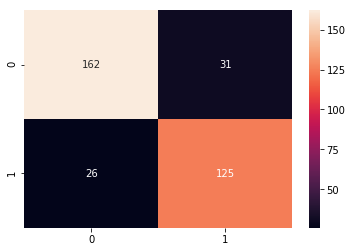

In [16]:
# confusion matrix
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True,fmt="d")

### Decision Tree Cross validation 

In [17]:
# evaluate the model using 10-fold cross-validation
cv_scores = cross_val_score(DecisionTreeClassifier(random_state=4), standardized_X, y.ravel(), scoring='accuracy', cv=10)
print(cv_scores)

print("The Cross validation score on Decision Tree:",cv_scores.mean())


[ 0.7826087   0.79130435  0.7826087   0.8         0.69298246  0.85087719
  0.39473684  0.47368421  0.63157895  0.57017544]
The Cross validation score on Decision Tree: 0.677055682685


### Random Forest 

In [18]:
rfc = RandomForestClassifier(n_estimators=100,random_state=4)     
rfc = rfc.fit(X_train,y_train)
ac_rfc = accuracy_score(y_test,rfc.predict(X_test))
print('Accuracy is: ',ac_rfc)

Accuracy is:  0.898255813953


In [20]:
# classification report
print(classification_report(y_test,rfc.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.91      0.91      0.91       193
        1.0       0.88      0.89      0.88       151

avg / total       0.90      0.90      0.90       344



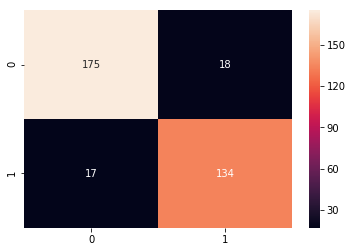

In [22]:
# confusion matrix
cm = confusion_matrix(y_test,rfc.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

### Random Forest Feature Importance 

Feature ranking:
1. feature 5 (0.158057)
2. feature 6 (0.153848)
3. feature 8 (0.130520)
4. feature 10 (0.109225)
5. feature 9 (0.089198)
6. feature 2 (0.078864)
7. feature 3 (0.069402)
8. feature 1 (0.060646)
9. feature 4 (0.055099)
10. feature 7 (0.051732)
11. feature 0 (0.043408)


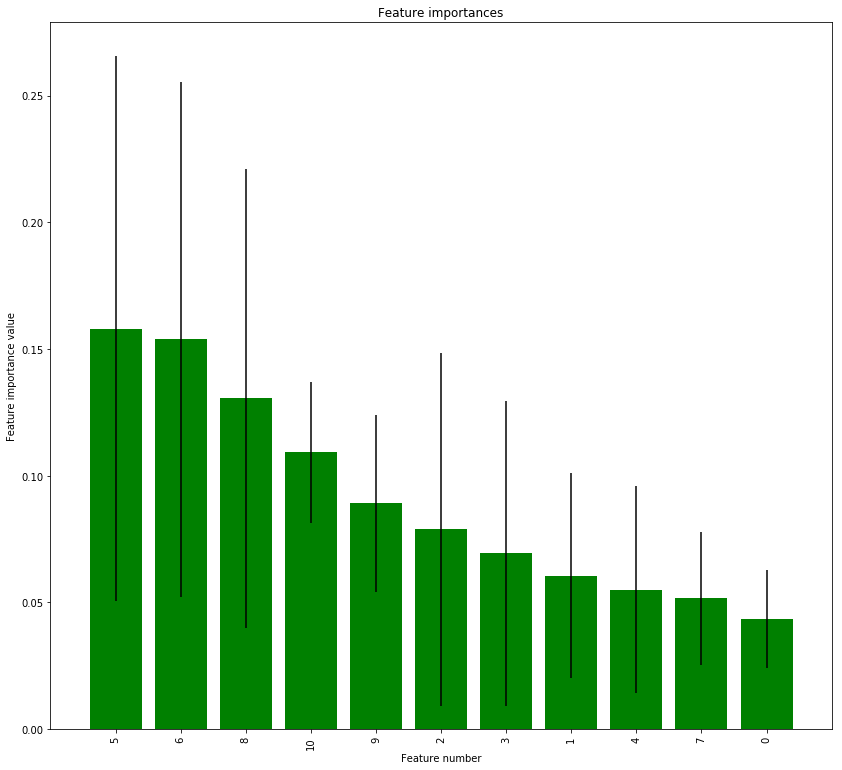

In [23]:
import numpy as np
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
labels =[]
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    labels.append(indices[f])
# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
 
plt.xticks(range(X_train.shape[1]), labels,rotation=90)
plt.xlabel("Feature number")
plt.ylabel("Feature importance value")
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
Feature 0(PID) has least importance value.

### Random Forest Cross validation

In [13]:
# evaluate the model using 10-fold cross-validation
rfc_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100,random_state=4), standardized_X, y.ravel(), scoring='accuracy', cv=10)
print(rfc_cv_scores)

print("The Cross validation score on Random Forest:",rfc_cv_scores.mean())

[0.84347826 0.93913043 0.71304348 0.85217391 0.85964912 0.86842105
 0.5877193  0.56140351 0.63157895 0.60526316]
The Cross validation score on Random Forest: 0.746186117467582
